In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

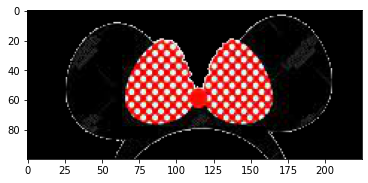

In [24]:
crown=cv2.imread("cascades/gambar/bando.png")      

crown=crown[50:150,:]
plt.imshow(cv2.cvtColor(crown,2))

In [22]:
print("image1 size: ", crown.shape)

image1 size:  (100, 225, 3)


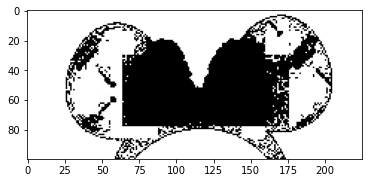

In [17]:
zero=np.zeros((crown.shape[0],crown.shape[1],3),dtype="uint8")
crown_thresh=crown.copy()
for i in range(crown.shape[0]):
    for j in range(crown.shape[1]):
        if(crown[i][j][0]<5 and crown[i][j][1]<5 and crown[i][j][2]<5):
            ;
        else:
            crown_thresh[i][j]=[255,255,255]
crown_thresh_not=cv2.bitwise_not(crown_thresh)
plt.imshow(cv2.cvtColor(crown_thresh_not,2))




In [25]:
cap=cv2.VideoCapture(0)
while(True):
    a,img=cap.read()
    gray=cv2.cvtColor(img,1)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        if(y>100):
            roi=img[y-crown.shape[0]:y,x:x+crown.shape[1]]
            crown_or=cv2.bitwise_and(roi,crown_thresh_not)
            crown_and=cv2.add(crown_or,crown)
            img[y-crown.shape[0]:y,x:x+crown.shape[1]]=crown_and
    cv2.imshow("Output",img)
    if(cv2.waitKey(1)&0xff==27):
        break
cap.release()
cv2.destroyAllWindows()